# Multiclass Plant Leaf Disease Detection with FastAI

## Objective

This notebook presents a deep learning approach to classify plant leaf images into multiple classes, each representing a specific crop type and its associated disease (or a healthy state). Using the PlantVillage dataset and FastAI, we will build a robust multiclass image classifier.

---

## Dataset

We use the [PlantVillage dataset](https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset). Each image is labeled with the crop type and disease status, e.g.:

- `Tomato___Early_blight`
- `Potato___Healthy`
- `Apple___Black_rot`

The goal is to classify any given leaf image into one of the 38 categories.

---

## Tools & Libraries

- [FastAI](https://www.fast.ai/)
- PyTorch
- Python 3
- Kaggle GPU environment

---


In [ ]:
# Installing FastAI
!pip install -Uqq fastai --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.6 MB/s eta 0:00:00
ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you'll have pylibraft-cu12 25

In [2]:
# Importing the necessary modules
from fastai.vision.all import *

# Confirm successful import
print("FastAI libraries imported successfully.")

FastAI libraries imported successfully.


In [3]:
# Set the path to the color images
path = Path("/kaggle/input/plantvillage-dataset/color")

In [4]:
# Define the DataBlock
plantblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms = [Resize(460)],
    batch_tfms = aug_transforms(
        size=224,
        max_warp=0.2,
        flip_vert=True,
        max_lighting=0.2
    )
)

In [5]:
# Create the DataLoaders
dls = plantblock.dataloaders(path, bs=16)

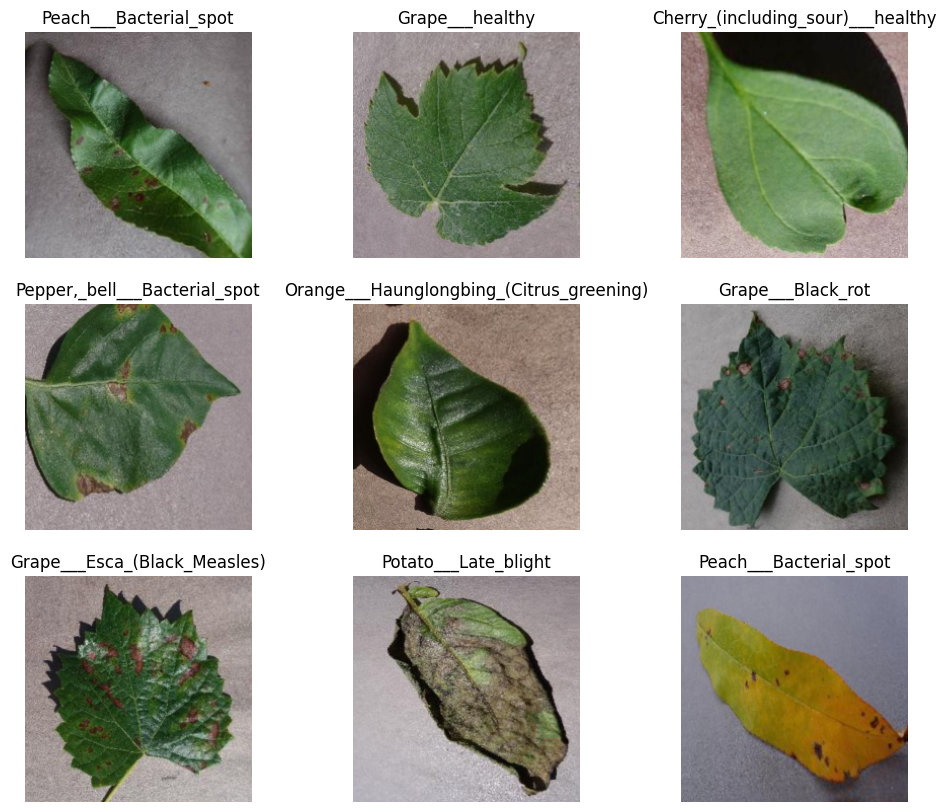

In [6]:
# Preview the data
dls.show_batch(max_n=9, figsize=(12, 10))

In [7]:
# Create and fine tune the model
learn = vision_learner(dls, 'convnext_small_in22k', metrics=accuracy, pretrained=True)
learn.fine_tune(5)

/usr/local/lib/python3.11/dist-packages/timm/models/_factory.py:126: UserWarning: Mapping deprecated model name convnext_small_in22k to current convnext_small.fb_in22k.
  model = create_fn(


model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.193619,0.073538,0.976614,12:58


epoch,train_loss,valid_loss,accuracy,time
0,0.081425,0.030343,0.991437,26:14
1,0.065148,0.015766,0.995304,26:16
2,0.038705,0.013053,0.996501,26:15
3,0.018991,0.007031,0.997698,26:16
4,0.008368,0.005762,0.998527,26:15


In [8]:
import requests
from fastai.vision.all import PILImage
from PIL import Image
from io import BytesIO

# Function to download an image from a URL and load it into FastAI
def download_and_load_image(url):
    # Download the image
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    
    # Show the image
    display(img)

    # If you need to use it in a FastAI model (i.e., make predictions)
    pil_img = PILImage.create(BytesIO(response.content))
    return pil_img

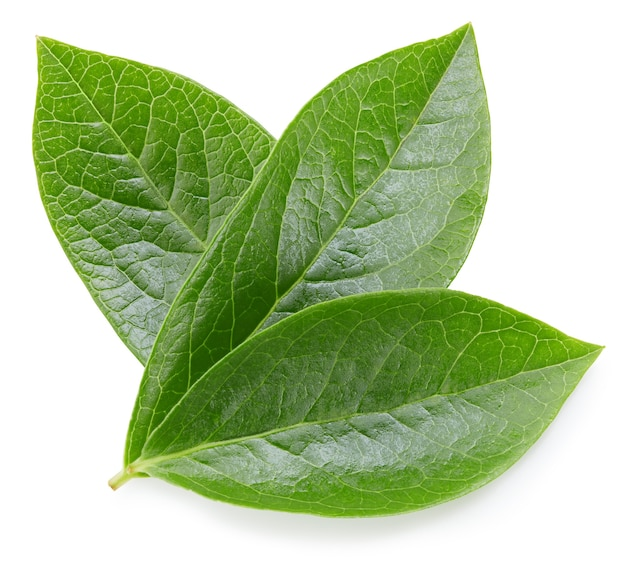

In [9]:
# Example URL of an image
image_url = "https://img.freepik.com/premium-photo/blueberry-leaves-isolated-white-background-leaves-clipping-path_299651-427.jpg"
img = download_and_load_image(image_url)

In [10]:
# Predict the class and get the probabilities
pred_class, pred_idx, probs = learn.predict(img)

# Format the output as requested
print(f"This is a: {pred_class}.")
print(f"Probability it's a {pred_class}: {probs[pred_idx]:.4f}")

This is a: Blueberry___healthy.
Probability it's a Blueberry___healthy: 1.0000
